In [24]:
import numpy, matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [20]:
plt.style.use('seaborn-muted')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = None

In [1]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.optimizers

Using Theano backend.


In [2]:
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=2))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [3]:
optimizer = keras.optimizers.SGD(decay=0.001, momentum=0.99)

In [4]:
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [7]:
X_train = numpy.random.randn(10000, 2)
print(X_train.shape)

(10000, 2)


In [8]:
print(X_train[:5])

[[-0.17079731 -0.83263599]
 [-0.90129258 -1.91990543]
 [-0.21567505  0.71459591]
 [-0.53271928  0.81538438]
 [ 1.97930384  0.02251911]]


In [9]:
y_train = numpy.array([
    [float(x[0]*x[1] > 0), float(x[0]*x[1] <= 0)]
    for x in X_train
])
print(y_train.shape)

(10000, 2)


In [10]:
y_train[:5]

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

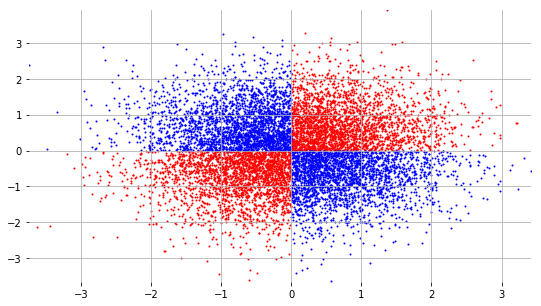

In [25]:
plt.figure(figsize=(9, 5))
plt.scatter(X_train[y_train[:,0]>0.5,0], X_train[y_train[:,0]>0.5,1], c='r', s=1)
plt.scatter(X_train[y_train[:,1]>0.5,0], X_train[y_train[:,1]>0.5,1], c='b', s=1)

In [13]:
results = model.fit(X_train, y_train, epochs=200, batch_size=100)

Epoch 1/200
10000/10000 [==============================] - 0s 17us/step - loss: 0.6635
Epoch 2/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.5995
Epoch 3/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.5369
Epoch 4/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.5064
Epoch 5/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.5036
Epoch 6/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.5006
Epoch 7/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.5030
Epoch 8/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.4945
Epoch 9/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.4898
Epoch 10/200
10000/10000 [==============================] - 0s 6us/step - loss: 0.4898
Epoch 11/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.4885
Epoch 12/200
10000/10000 [=========================

10000/10000 [==============================] - 0s 9us/step - loss: 0.4845
Epoch 96/200
10000/10000 [==============================] - 0s 8us/step - loss: 0.4850
Epoch 97/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.4846
Epoch 98/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.4850
Epoch 99/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.4844
Epoch 100/200
10000/10000 [==============================] - 0s 7us/step - loss: 0.4841
Epoch 101/200
10000/10000 [==============================] - 0s 8us/step - loss: 0.4842
Epoch 102/200
10000/10000 [==============================] - 0s 8us/step - loss: 0.4844
Epoch 103/200
10000/10000 [==============================] - 0s 8us/step - loss: 0.4843
Epoch 104/200
10000/10000 [==============================] - 0s 8us/step - loss: 0.4843
Epoch 105/200
10000/10000 [==============================] - 0s 8us/step - loss: 0.4850
Epoch 106/200
10000/10000 [=======================

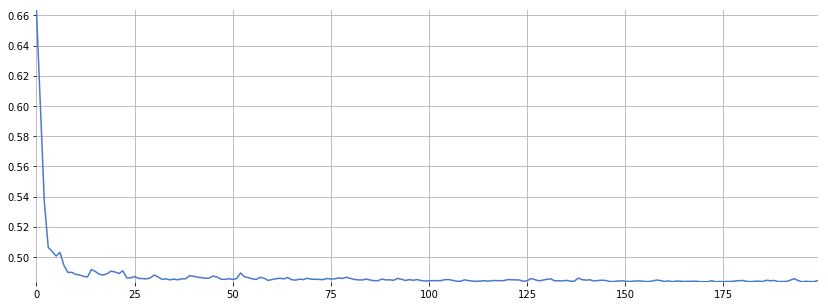

In [22]:
plt.plot(results.history['loss'])

In [15]:
X_test = numpy.random.randn(5000, 2)

In [16]:
y_test = model.predict(X_test)

In [17]:
y_test.shape

(5000, 2)

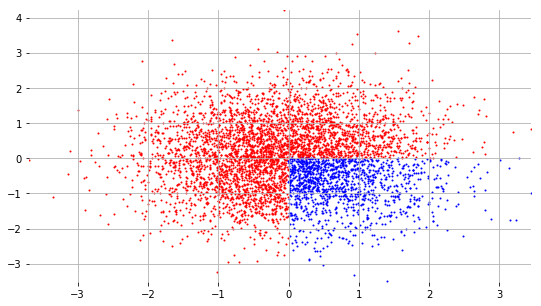

In [26]:
plt.figure(figsize=(9, 5))
plt.scatter(X_test[y_test[:, 0] > 0.5,0], X_test[y_test[:, 0] > 0.5,1], c='r', s=1)
plt.scatter(X_test[y_test[:, 1] > 0.5,0], X_test[y_test[:, 1] > 0.5,1], c='b', s=1)